In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


In [ ]:

# загрузка набора данных
housing = fetch_california_housing()
X, y = housing.data, housing.target
X = pd.DataFrame(X, columns=housing.feature_names)
# подготовка признаков
X = X.drop(['Population', 'AveBedrms', 'AveOccup'], axis=1)
print(X)

       MedInc  HouseAge  AveRooms  Latitude  Longitude
0      8.3252      41.0  6.984127     37.88    -122.23
1      8.3014      21.0  6.238137     37.86    -122.22
2      7.2574      52.0  8.288136     37.85    -122.24
3      5.6431      52.0  5.817352     37.85    -122.25
4      3.8462      52.0  6.281853     37.85    -122.25
...       ...       ...       ...       ...        ...
20635  1.5603      25.0  5.045455     39.48    -121.09
20636  2.5568      18.0  6.114035     39.49    -121.21
20637  1.7000      17.0  5.205543     39.43    -121.22
20638  1.8672      18.0  5.329513     39.43    -121.32
20639  2.3886      16.0  5.254717     39.37    -121.24

[20640 rows x 5 columns]


In [ ]:
# Imputing missing values in total_bedrooms by median Нужно при заполнении пропусков
X['AveRooms'].fillna(X['AveRooms'].median(), inplace=True)

<ipython-input-8-98ee49ed503d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['AveRooms'].fillna(X['AveRooms'].median(), inplace=True)


In [ ]:
# now check for missing values in total bedrooms
X.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
Latitude,0
Longitude,0


In [ ]:
# разделение данных на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучение модели XGBoost
model_X = XGBRegressor(objective='reg:squarederror', random_state=4)
model_X.fit(X_train, y_train)

#Обучение модели RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model_R = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model_R.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_X = model_X.predict(X_test) #предсказания
y_pred_R = model_R.predict(X_test)
y_true = y_test

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_X = mean_absolute_error(y_true, y_pred_X)
mse_X = mean_squared_error(y_true, y_pred_X)
r2_X = r2_score(y_true, y_pred_X)

print(f"MAE: {mae_X:.2f}") #оценки по XGBoost
print(f"RMSE: {mse_X:.2f}")
print(f"R²: {r2_X :.2f}")

MAE: 0.32
RMSE: 0.23
R²: 0.83


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_R = mean_absolute_error(y_true, y_pred_R)
mse_R = mean_squared_error(y_true, y_pred_R)**(0.5)
r2_R = r2_score(y_true, y_pred_R)

print(f"MAE: {mae_R:.2f}") #оценки по RandomForestRegressor
print(f"RMSE: {mse_R:.2f}")
print(f"R²: {r2_R :.2f}")

MAE: 0.50
RMSE: 0.70
R²: 0.63


In [ ]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model_X)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [ ]:
import shap
explainer = shap.Explainer(model_R)
shap_values = explainer(X_test)

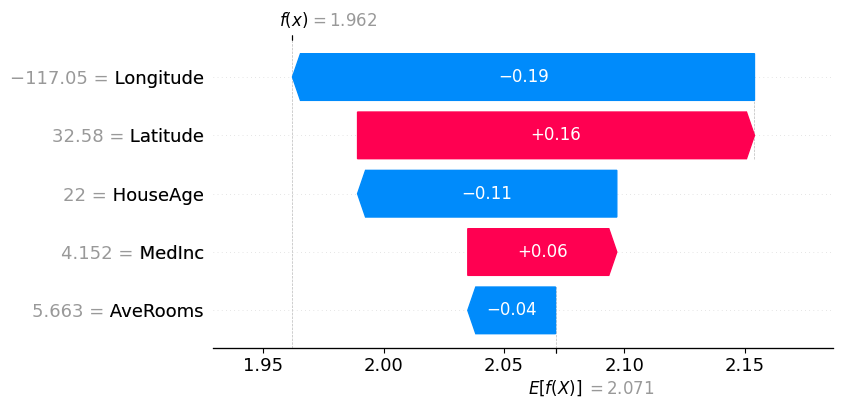

In [ ]:
shap.plots.waterfall(shap_values[0])

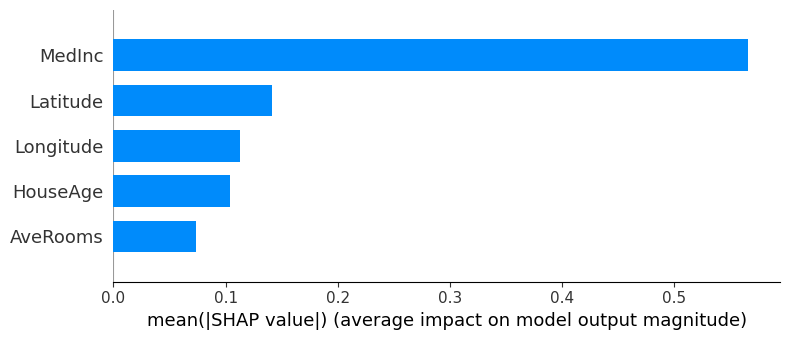

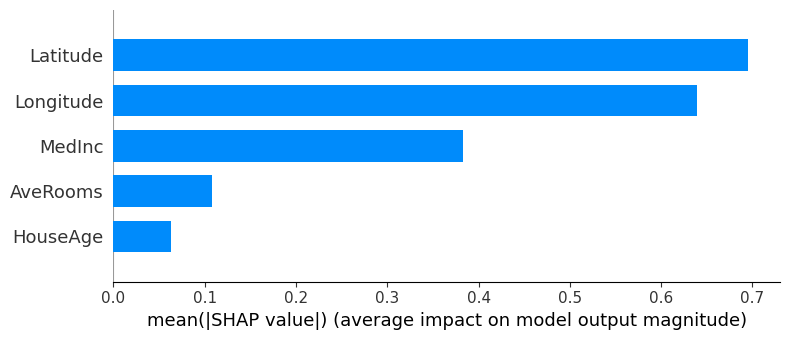

In [ ]:
#feature importance
shap_values = shap.TreeExplainer(model_R).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

#feature importance
shap_values = shap.TreeExplainer(model_X).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

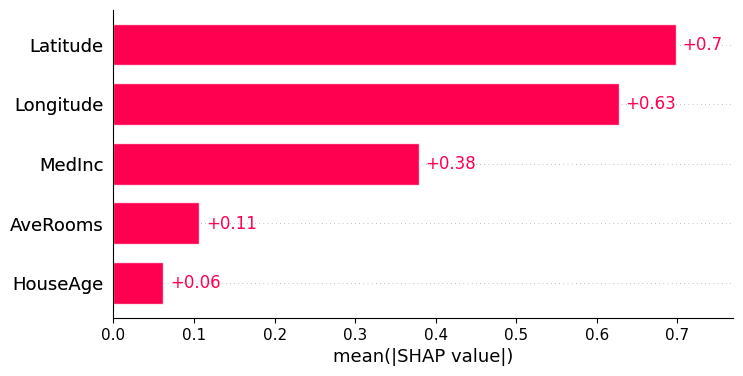

In [ ]:
shap.plots.bar(shap_values)


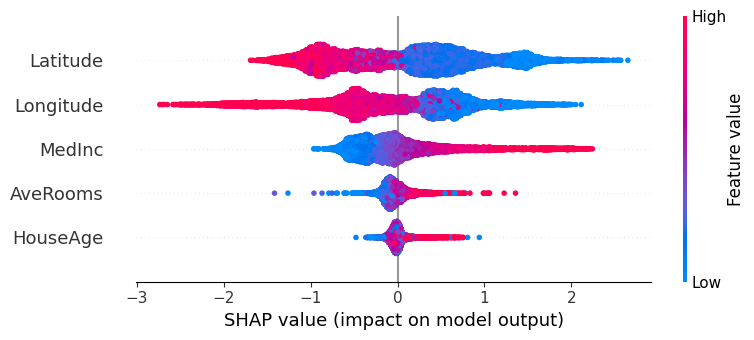

In [ ]:
shap.summary_plot(shap_values, X_train)

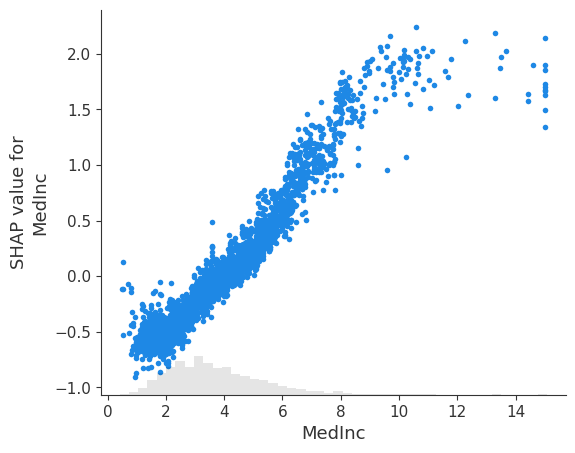

In [ ]:
shap.plots.scatter(shap_values[:,"MedInc"])
